In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
df_city=pd.read_csv('city_data.csv')
df_ride=pd.read_csv('ride_data.csv')

# Read the City and Ride Data

# Combine the data into a single dataset
df_merge=pd.merge(df_city, df_ride, on='city')

# Display the data table for preview
print(df_merge.head())

          city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850


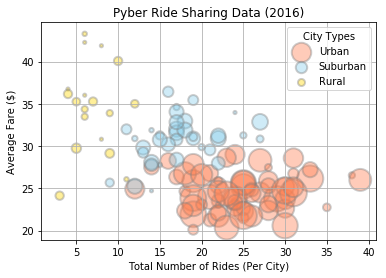

In [5]:
df_mean_fare_city=df_merge.groupby("city")[["fare"]].mean()

df_total_ride_city=df_merge.groupby("city")[["ride_id"]].count()

df_total_driver_city=df_city[["city","driver_count"]]
df_total_driver_city=df_total_driver_city.set_index("city")

df_city_type=df_city[["city","type"]]
df_city_type=df_city_type.set_index("city")


df_merge_total=pd.merge(df_mean_fare_city, df_total_ride_city, on='city')
df_merge_total=pd.merge(df_merge_total, df_total_driver_city, on='city')
df_merge_total=pd.merge(df_merge_total, df_city_type, on='city')
df_merge_total=df_merge_total.reset_index()

x=df_merge_total["ride_id"][df_merge_total.type=="Urban"]
y=df_merge_total["fare"][df_merge_total.type=="Urban"]
z=df_merge_total["driver_count"][df_merge_total.type=="Urban"]
plt.scatter(x, y, s=z*10, c="coral", alpha=0.4, edgecolors="grey", linewidth=2,label="Urban")

x=df_merge_total["ride_id"][df_merge_total.type=="Suburban"]
y=df_merge_total["fare"][df_merge_total.type=="Suburban"]
z=df_merge_total["driver_count"][df_merge_total.type=="Suburban"]
plt.scatter(x, y, s=z*10, c="skyblue", alpha=0.4, edgecolors="grey", linewidth=2,label="Suburban")

x=df_merge_total["ride_id"][df_merge_total.type=="Rural"]
y=df_merge_total["fare"][df_merge_total.type=="Rural"]
z=df_merge_total["driver_count"][df_merge_total.type=="Rural"]
plt.scatter(x, y, s=z*10, c="gold", alpha=0.4, edgecolors="grey", linewidth=2,label="Rural")

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.legend(title="City Types")
plt.grid()
plt.show()

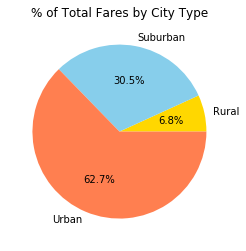

In [6]:
# Pie 1
mycolors =[ 'gold','Skyblue', 'coral' ]

df_pie_1=df_merge.groupby("type")[["fare"]].sum()
df_pie_1=df_pie_1.reset_index()

labels=df_pie_1["type"]
x=df_pie_1["fare"]
plt.pie(x,labels=labels,autopct='%1.1f%%',colors=mycolors)
plt.title("% of Total Fares by City Type")
plt.show()

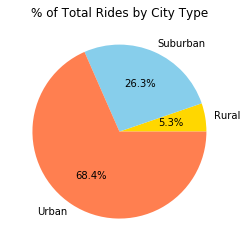

In [7]:

# Pie 2
df_pie_2=df_merge.groupby("type")[["ride_id"]].count()
df_pie_2=df_pie_2.reset_index()

labels=df_pie_2["type"]
x=df_pie_2["ride_id"]
plt.pie(x,labels=labels,autopct='%1.1f%%',colors=mycolors)
plt.title("% of Total Rides by City Type")
plt.show()

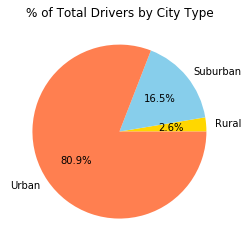

In [8]:
# Pie 3
df_pie_3=df_city.groupby("type")[["driver_count"]].sum()
df_pie_3=df_pie_3.reset_index()

labels=df_pie_3["type"]
x=df_pie_3["driver_count"]
plt.pie(x,labels=labels,autopct='%1.1f%%',colors=mycolors)
plt.title("% of Total Drivers by City Type")
plt.show()

In [ ]:
#From our charts we can make 3 conclusions:
#Rural has the largest gap in price of any city area.
#The total number of rides is generally higher in urban areas than in suburban and rural areas.
#We can conclude that rural charges the most on average followed by suburban and finally by urban.
